<a href="https://colab.research.google.com/github/LaviWhite/ML/blob/main/6002_Semantic_data_mining_MTR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ruptures

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 15.5 MB/s eta 0:00:00


In [ ]:
from pathlib import Path
import nltk
import numpy as np
import ruptures as rpt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import regexp_tokenize
from ruptures.base import BaseCost
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LogNorm
import pandas as pd

In [ ]:
nltk.download("stopwords")
STOPWORD_SET = set(
    stopwords.words("english")
)  # set of stopwords of the English language
PUNCTUATION_SET = set("!\"#$%&'()*+,-./:;<=>?@[\\]^_`{|}~")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def preprocess(list_of_sentences: list) -> list:
    """Preprocess each sentence (remove punctuation, stopwords, then stemming.)"""
    transformed = list()
    for sentence in list_of_sentences:
        ps = PorterStemmer()
        list_of_words = regexp_tokenize(text=sentence.lower(), pattern="\w+")
        list_of_words = [
            ps.stem(word) for word in list_of_words if word not in STOPWORD_SET
        ]
        transformed.append(" ".join(list_of_words))
    return transformed

In [ ]:
def draw_square_on_ax(start, end, ax, linewidth=0.8):
    """Draw a square on the given ax object."""
    ax.vlines(
        x=[start - 0.5, end - 0.5],
        ymin=start - 0.5,
        ymax=end - 0.5,
        linewidth=linewidth,
    )
    ax.hlines(
        y=[start - 0.5, end - 0.5],
        xmin=start - 0.5,
        xmax=end - 0.5,
        linewidth=linewidth,
    )
    return ax

In [ ]:
def draw_square_on_ax(start, end, ax, linewidth=0.8):
    """Draw a square on the given ax object."""
    ax.vlines(
        x=[start - 0.5, end - 0.5],
        ymin=start - 0.5,
        ymax=end - 0.5,
        linewidth=linewidth,
    )
    ax.hlines(
        y=[start - 0.5, end - 0.5],
        xmin=start - 0.5,
        xmax=end - 0.5,
        linewidth=linewidth,
    )
    return ax

In [ ]:
dz = pd.read_excel('/content/SHT notification_210401_220401.xlsx')
dx = pd.read_excel('/content/SHT notification_220401-221130.xlsx')
df = pd.concat([dz, dx], ignore_index=True)

In [ ]:
title = pd.concat([dz['title'], dx['title']], ignore_index=True)
description = pd.concat([dz['description'], dx['description']], ignore_index=True)
Actions = pd.concat([dz['recommendedActions'], dx['recommendedActions']], ignore_index=True)
de = pd.concat([title, description, Actions], ignore_index=True)

In [ ]:
title.astype("string")
description.astype("string")
Actions.astype("string")

0      1. Check chiller compressor motor (bearing & p...
1      1. Check Chilled Water Flow rate and ensure th...
2      1. Check chiller electrical supply and capacit...
3      1. Check if Chiller internal compressor VFD is...
4      1. Check if individual chiller setpoints are a...
                             ...                        
447    1. Check chiller staging and sequencing logic....
448    1. Check Chiller Isolation valve 
2. Check if ...
449    1. Check chiller compressor motor (bearing & p...
450    1. Check chiller staging and sequencing logic....
451    1. Check chiller electrical supply and capacit...
Name: recommendedActions, Length: 452, dtype: string

In [ ]:
vectorizer_x = CountVectorizer()
vectorized_x_text = vectorizer_x.fit_transform(title)

msg = f"There are {len(vectorizer_x.get_feature_names_out())} different words in the corpus, e.g. {vectorizer_x.get_feature_names_out()}."
print(msg)

There are 80 different words in the corpus, e.g. ['1a' '27' '2a' '83' 'across' 'actual' 'ahu' 'all' 'an' 'and' 'approach'
 'at' 'by' 'chilled' 'chiller' 'chwrt' 'chwst' 'ckt' 'ckt2' 'control'
 'cop' 'cycling' 'deg' 'diff' 'difference' 'disconnection' 'evaporator'
 'exceed' 'factor' 'feedback' 'flatlined' 'flow' 'for' 'from' 'greater'
 'has' 'header' 'high' 'hour' 'individual' 'is' 'least' 'less' 'lesser'
 'linear' 'loading' 'low' 'mismatch' 'motor' 'network' 'non' 'normal'
 'off' 'on' 'operating' 'outside' 'overcooling' 'points' 'power'
 'pressure' 'pump' 'range' 'refrigerant' 'relationship' 'return'
 'setpoint' 'short' 'space' 'speed' 'supply' 'temperature' 'than' 'tonn1'
 'too' 'value' 'vsd' 'water' 'when' 'winding' 'with'].


In [ ]:
vectorizer_y = CountVectorizer()
vectorized_y_text = vectorizer_y.fit_transform(description)

msg = f"There are {len(vectorizer_y.get_feature_names_out())} different words in the corpus, e.g. {vectorizer_y.get_feature_names_out()}."
print(msg)

There are 114 different words in the corpus, e.g. ['10' '1a' '20' '27' '2a' '30' '50' '55' '83' 'actual' 'ahu' 'algorithm'
 'all' 'analysis' 'and' 'approach' 'are' 'based' 'by' 'chilled' 'chiller'
 'chwrt' 'chwst' 'ckt2' 'compared' 'control' 'cop' 'data' 'deg' 'delta'
 'differ' 'difference' 'different' 'differential' 'disconnection' 'during'
 'evap' 'evap_sat_ref_pressure' 'evap_sat_ref_temperature' 'evaporator'
 'exceed' 'factor' 'feedback' 'flatlined' 'flow' 'for' 'generated'
 'greater' 'has' 'header' 'high' 'historical' 'hour' 'hours' 'individual'
 'interval' 'is' 'less' 'lesser' 'linear' 'loading' 'low' 'minutes' 'more'
 'motor' 'network' 'non' 'normal' 'obtained' 'of' 'off' 'on' 'operating'
 'operation' 'optimization' 'or' 'outliers' 'outside' 'over' 'period'
 'phenomenon' 'points' 'power' 'pressure' 'psid' 'pump' 'range' 'rate'
 'ref' 'refrigerant' 'relationship' 'return' 'running' 'sat' 'setpoint'
 'space' 'speed' 'supply' 'temp' 'temperature' 'than' 'the' 'thresholds'
 'to' 'to

In [ ]:
vectorizer_z = CountVectorizer()
vectorized_z_text = vectorizer_z.fit_transform(Actions)

msg = f"There are {len(vectorizer_z.get_feature_names_out())} different words in the corpus, e.g. {vectorizer_z.get_feature_names_out()}."
print(msg)

There are 127 different words in the corpus, e.g. ['10' 'accuracy' 'across' 'ahu' 'and' 'approach' 'are' 'as' 'banks'
 'bearing' 'bms' 'bypass' 'capacitor' 'change' 'charge' 'check' 'chilled'
 'chiller' 'chillers' 'chw' 'chwp' 'chwst' 'closed' 'cold' 'compressor'
 'condenser' 'conditions' 'connection' 'constant' 'contact'
 'contamination' 'control' 'controller' 'controls' 'conversion' 'cooling'
 'deg' 'design' 'diff' 'differential' 'electrical' 'ensure' 'equipment'
 'evap' 'evaporator' 'fan' 'fault' 'faulty' 'feedback' 'flow' 'following'
 'for' 'from' 'full' 'high' 'if' 'in' 'increase' 'individual' 'internal'
 'is' 'isolation' 'it' 'level' 'logic' 'malfunctioning' 'manual' 'met'
 'mode' 'motor' 'network' 'not' 'of' 'oil' 'optimize' 'or' 'outdoor'
 'over' 'overridden' 'per' 'physical' 'please' 'point' 'pressure' 'pump'
 'pumps' 'rate' 'rectification' 'reduce' 'ref' 'refrigerant' 'reset'
 'return' 'ridden' 'sat' 'saturated' 'sensor' 'sensors' 'sequencing' 'set'
 'setpoint' 'setpoints' 's

In [ ]:
vectorizer = CountVectorizer(max_features = 10)
vectorized_text = vectorizer.fit_transform(title)

msg = f"There are {len(vectorizer.get_feature_names_out())} different words in the corpus, e.g. {vectorizer.get_feature_names_out()}."
print(msg)

There are 10 different words in the corpus, e.g. ['and' 'chiller' 'deg' 'difference' 'evaporator' 'lesser' 'motor' 'supply'
 'temperature' 'than'].


In [ ]:
vectorizer_description = CountVectorizer(max_features = 10)
vectorized_d = vectorizer_description.fit_transform(description)

msg = f"There are {len(vectorizer_description.get_feature_names_out())} different words in the corpus, e.g. {vectorizer_description.get_feature_names_out()}."
print(msg)

There are 10 different words in the corpus, e.g. ['chiller' 'deg' 'for' 'hours' 'is' 'more' 'of' 'or' 'period'
 'temperature'].


In [ ]:
vectorizer_Actions = CountVectorizer(max_features = 10)
vectorized_a = vectorizer_Actions.fit_transform(Actions)

msg = f"There are {len(vectorizer_Actions.get_feature_names_out())} different words in the corpus, e.g. {vectorizer_Actions.get_feature_names_out()}."
print(msg)

There are 10 different words in the corpus, e.g. ['and' 'check' 'chilled' 'chiller' 'compressor' 'ensure' 'is' 'not' 'the'
 'water'].


In [ ]:
equip = pd.concat([df['equip'], dx['equip']], ignore_index=True)

# Co-occurrence and Networks of Words

In [ ]:
#load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec
from matplotlib.patches import Rectangle

import pandas as pd
import statsmodels.api as sm

# import pyarrow.parquet as pq
# import pyarrow as pa


import os

import itertools
import collections

#---NLP packages--------------------
import nltk
from nltk import bigrams
from nltk.corpus import stopwords
from nltk.util import ngrams

#----process string-------
import string
import re

#---network visualization-----------
import re
import networkx as nx


import warnings
warnings.filterwarnings("ignore")

In [ ]:
def clean_text(sentence):
    sentence = re.sub("[%s]" % re.escape(string.punctuation), "", sentence.lower())
    sentence = re.sub("([^\x00-\x7F])+", " ", sentence)
    sentence = sentence.replace('\n', ' ').replace('.', ' ').replace(',', ' ').replace('?', ' ')\
    .replace('\r', ' ').replace('!', ' ').replace('"\r', ' ').replace('"', ' ')\
    .replace("'", ' ').replace("''", ' ').replace('(', ' ').replace(')', ' ').replace(']', ' ')\
    .replace('-', ' ').replace('/', ' ')

    while ('  ' in sentence):
        sentence = sentence.replace('  ', ' ')
    return sentence

In [ ]:
eng_stopwords = set(stopwords.words('english')) | {''}

In [ ]:
def get_words(sentence, stopwords):
    words = set(sentence.split(' '))
    words = list(words-set(stopwords))
    if '' in words:
        words.remove('')
    return list(words)

# Overall

In [ ]:
# Create a sublist of lower case words for each sample

txts = de.values.tolist()
words_in_text = []
for txt in txts:
    txt = clean_text(txt)
    words_in_text.append(get_words(txt, eng_stopwords))

In [ ]:
word_pairs = []
for words in words_in_text:
    words_ = list(set(words))
    for i in range(len(words_)-1):
        for j in range(i+1, len(words_)):
            word_i = words_[i]
            word_j = words_[j]
            if word_i < word_j:
                word_pairs.append([word_i, word_j])
            else:
                word_pairs.append([word_i, word_j])

In [ ]:
df_word_pairs = pd.DataFrame(data = word_pairs, columns=['word1', 'word2'])
word_pairs_count = df_word_pairs.groupby(['word1', 'word2']).size()
word_pairs_count = word_pairs_count.sort_values().tail(200).reset_index()

In [ ]:
word_pairs_count.tail(5)

word1  word2    0
195      chiller  check  374
196        check      2  387
197  temperature      c  430
198  temperature    deg  430
199      chiller      2  511

In [ ]:
# Create list of lists containing bigrams
terms_bigram = [list(bigrams(words)) for words in words_in_text]

# View bigrams for the first assay
print('View bigrams for the first assay')
print(terms_bigram[0][:5])

# Flatten list of bigrams in clean text
bigram_list = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigram_list)

bigram_counts.most_common(5)

View bigrams for the first assay
[('chiller', 'range'), ('range', 'normal'), ('normal', 'operating'), ('operating', 'ckt2'), ('ckt2', 'winding')]


[(('chiller', 'temperature'), 255),
 (('check', '2'), 239),
 (('2', '1'), 208),
 (('evaporator', 'chiller'), 177),
 (('temperature', 'deg'), 176)]

In [ ]:
# Create list of lists containing bigrams
terms_3gram = [list(ngrams(words, 3)) for words in words_in_text]

# View bigrams for the first assay
print('View N-grams (N=3) for the first assay')
print(terms_3gram[0][:5])


gram3_list = list(itertools.chain(*terms_3gram))

# Create counter of words in clean bigrams
gram3_counts = collections.Counter(gram3_list)

gram3_counts.most_common(5)

View N-grams (N=3) for the first assay
[('chiller', 'range', 'normal'), ('range', 'normal', 'operating'), ('normal', 'operating', 'ckt2'), ('operating', 'ckt2', 'winding'), ('ckt2', 'winding', 'temperature2a')]


[(('check', '2', '1'), 196),
 (('chiller', 'temperature', 'deg'), 164),
 (('temperature', 'deg', '3'), 158),
 (('evaporator', 'chiller', 'temperature'), 111),
 (('20', 'historical', 'data'), 104)]

In [ ]:
# Create network plot
G = nx.Graph()


for _, row in word_pairs_count.iterrows():
    G.add_edge(row['word1'], row['word2'], weight=row[0])

chiller 0.8780487804878049
temperature 0.5853658536585367
2 0.43902439024390244
water 0.43902439024390244
c 0.43902439024390244
chilled 0.41463414634146345
deg 0.41463414634146345
3 0.3902439024390244
1 0.3170731707317073
check 0.3170731707317073
setpoint 0.3170731707317073
supply 0.29268292682926833
difference 0.24390243902439024
hours 0.21951219512195122
period 0.21951219512195122
ensure 0.1951219512195122
running 0.1951219512195122
lesser 0.1951219512195122
flow 0.17073170731707318
outside 0.17073170731707318
motor 0.17073170731707318
normal 0.14634146341463417
operating 0.14634146341463417
data 0.14634146341463417
20 0.14634146341463417
historical 0.14634146341463417
winding 0.14634146341463417
chwrtchwst 0.12195121951219512
overridden 0.12195121951219512
return 0.12195121951219512
temperature2a 0.12195121951219512
evaporator 0.12195121951219512
obtained 0.12195121951219512
pumps 0.0975609756097561
analysis 0.0975609756097561
less 0.0975609756097561
range 0.0975609756097561
rate 0.

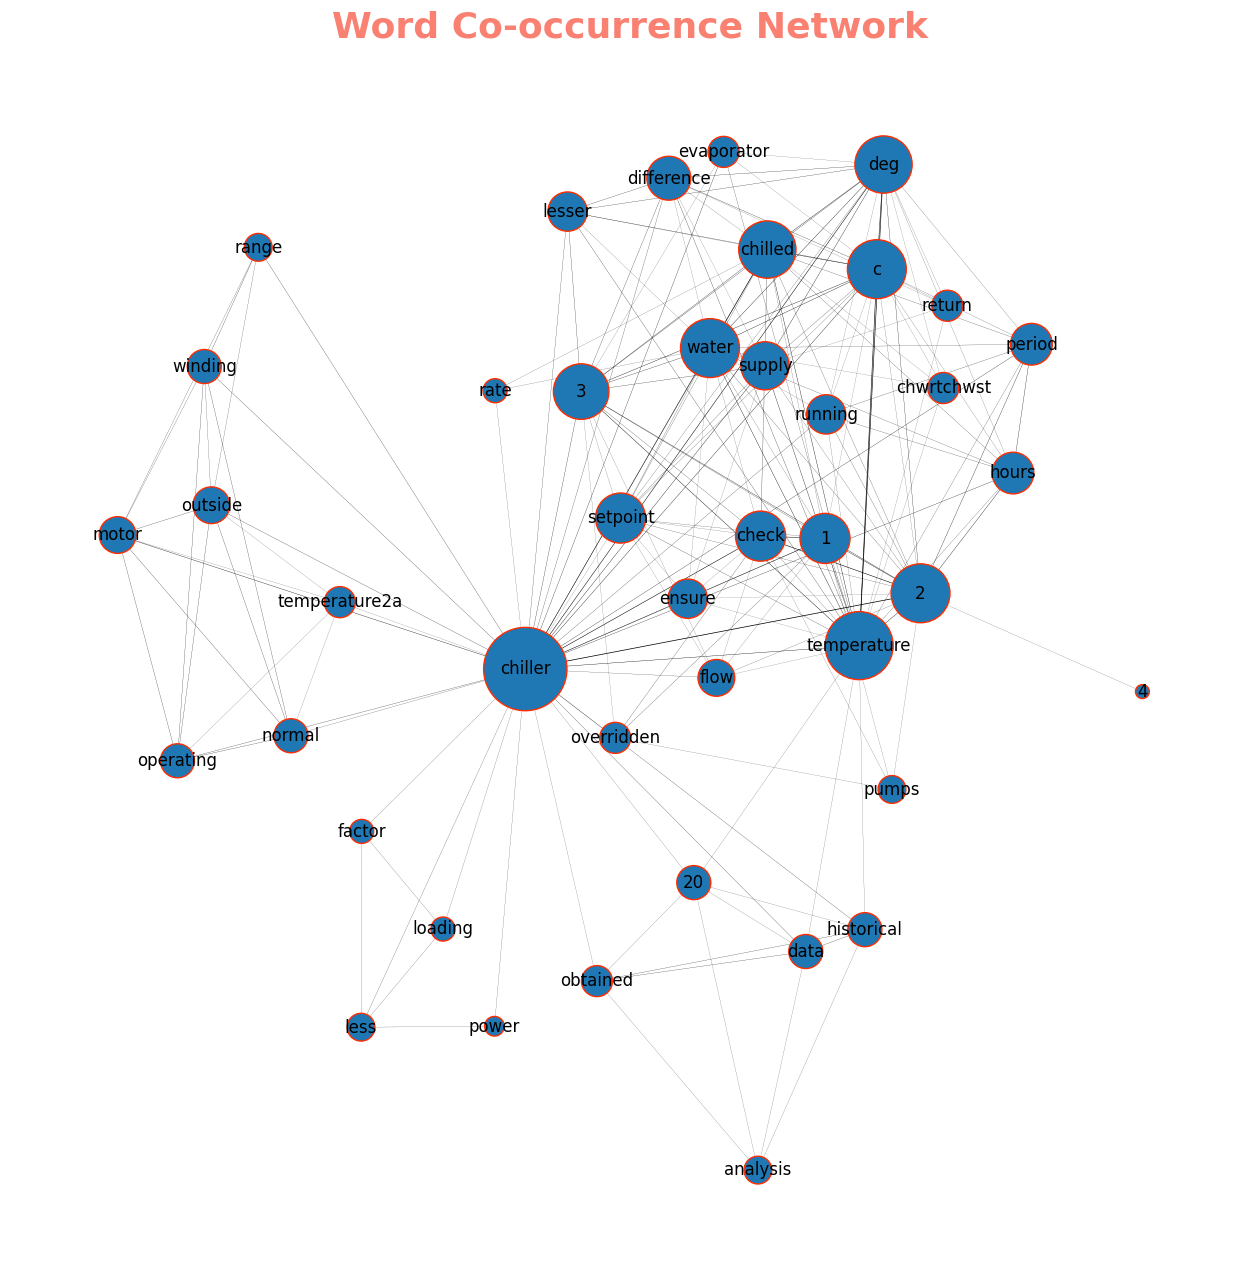

In [ ]:
pos_kkl = nx.kamada_kawai_layout(G)
f, ax = plt.subplots(figsize=(16, 16))


d = dict(nx.degree(G))
edges = G.edges()
weights = [G[u][v]['weight']/1000 for u,v in edges]

nx.draw(G, pos_kkl,
        with_labels=True,
        node_size=[v * 100 for v in d.values()],
        nodelist=d.keys(),
        width=weights,
        edge_color='black', #node_color=list(df_skills_stats['core_number']), cmap="coolwarm_r",
        #alpha=0.9,
       )
#node_labels = nx.draw_networkx_labels(G, pos_kkl, labels, font_size=10)
# Set title
ax.set_title('Word Co-occurrence Network',
             fontdict={'fontsize': 26,
            'fontweight': 'bold',
            'color': 'salmon',
            'verticalalignment': 'baseline',
            'horizontalalignment': 'center'},
             loc='center')
# Set edge color
plt.gca().collections[0].set_edgecolor("#FF2D00")

degree_centrality = nx.degree_centrality(G)
for node in sorted(degree_centrality, key=degree_centrality.get, reverse=True):
  print(node, degree_centrality[node])

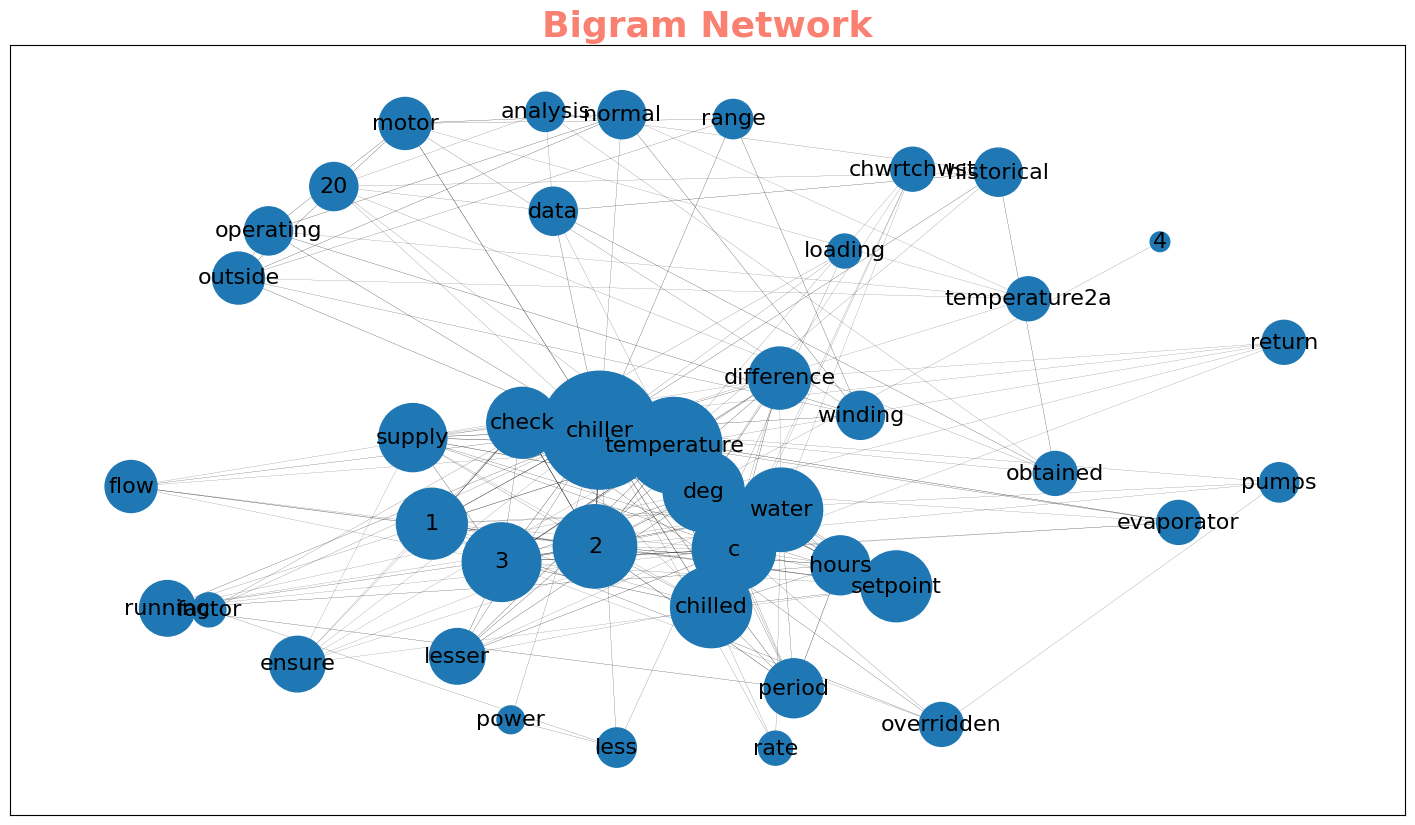

chiller 0.8780487804878049
temperature 0.5853658536585367
2 0.43902439024390244
water 0.43902439024390244
c 0.43902439024390244
chilled 0.41463414634146345
deg 0.41463414634146345
3 0.3902439024390244
1 0.3170731707317073
check 0.3170731707317073
setpoint 0.3170731707317073
supply 0.29268292682926833
difference 0.24390243902439024
hours 0.21951219512195122
period 0.21951219512195122
ensure 0.1951219512195122
running 0.1951219512195122
lesser 0.1951219512195122
flow 0.17073170731707318
outside 0.17073170731707318
motor 0.17073170731707318
normal 0.14634146341463417
operating 0.14634146341463417
data 0.14634146341463417
20 0.14634146341463417
historical 0.14634146341463417
winding 0.14634146341463417
chwrtchwst 0.12195121951219512
overridden 0.12195121951219512
return 0.12195121951219512
temperature2a 0.12195121951219512
evaporator 0.12195121951219512
obtained 0.12195121951219512
pumps 0.0975609756097561
analysis 0.0975609756097561
less 0.0975609756097561
range 0.0975609756097561
rate 0.

In [ ]:
fig, ax = plt.subplots(figsize=(18, 10))

pos = nx.spring_layout(G, k=8)

d = dict(nx.degree(G))
edges = G.edges()
weights = [G[u][v]['weight']/1000 for u,v in edges]
# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=weights,
                 node_size = [v * 200 for v in d.values()],
                 edge_color='black',
                 #node_color='tomato',
                 with_labels = True,
                 ax=ax)

ax.set_title('Bigram Network',
             fontdict={'fontsize': 26,
            'fontweight': 'bold',
            'color': 'salmon',
            'verticalalignment': 'baseline',
            'horizontalalignment': 'center'},
             loc='center')
plt.show()

degree_centrality = nx.degree_centrality(G)
for node in sorted(degree_centrality, key=degree_centrality.get, reverse=True):
  print(node, degree_centrality[node])

# Description

In [ ]:
# Create a sublist of lower case words for each sample

txts = df['description'].values.tolist()
words_in_text = []
for txt in txts:
    txt = clean_text(txt)
    words_in_text.append(get_words(txt, eng_stopwords))

In [ ]:
word_pairs = []
for words in words_in_text:
    words_ = list(set(words))
    for i in range(len(words_)-1):
        for j in range(i+1, len(words_)):
            word_i = words_[i]
            word_j = words_[j]
            if word_i < word_j:
                word_pairs.append([word_i, word_j])
            else:
                word_pairs.append([word_i, word_j])

In [ ]:
df_word_pairs = pd.DataFrame(data = word_pairs, columns=['word1', 'word2'])
word_pairs_count = df_word_pairs.groupby(['word1', 'word2']).size()
word_pairs_count = word_pairs_count.sort_values().tail(200).reset_index()

In [ ]:
word_pairs_count.tail(5)

word1   word2    0
195            2  period  217
196        hours  period  217
197  temperature     deg  219
198  temperature       c  219
199        hours       2  238

In [ ]:
# Create list of lists containing bigrams
terms_bigram = [list(bigrams(words)) for words in words_in_text]

# View bigrams for the first assay
print('View bigrams for the first assay')
print(terms_bigram[0][:5])

# Flatten list of bigrams in clean text
bigram_list = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigram_list)

bigram_counts.most_common(5)

View bigrams for the first assay
[('temperature', 'normal'), ('normal', 'c'), ('c', 'based'), ('based', 'chiller'), ('chiller', 'deg')]


[(('chiller', 'temperature'), 136),
 (('hours', '2'), 114),
 (('water', 'period'), 109),
 (('analysis', 'obtained'), 104),
 (('20', 'historical'), 104)]

In [ ]:
# Create list of lists containing bigrams
terms_3gram = [list(ngrams(words, 3)) for words in words_in_text]

# View bigrams for the first assay
print('View N-grams (N=3) for the first assay')
print(terms_3gram[0][:5])


gram3_list = list(itertools.chain(*terms_3gram))

# Create counter of words in clean bigrams
gram3_counts = collections.Counter(gram3_list)

gram3_counts.most_common(5)

View N-grams (N=3) for the first assay
[('temperature', 'normal', 'c'), ('normal', 'c', 'based'), ('c', 'based', 'chiller'), ('based', 'chiller', 'deg'), ('chiller', 'deg', 'operating')]


[(('20', 'historical', 'data'), 104),
 (('chwrtchwst', 'chiller', 'temperature'), 83),
 (('chiller', 'temperature', 'deg'), 82),
 (('2', 'c', 'water'), 82),
 (('c', 'water', 'period'), 82)]

In [ ]:
# Create network plot
G = nx.Graph()


for _, row in word_pairs_count.iterrows():
    G.add_edge(row['word1'], row['word2'], weight=row[0])

chiller 0.875
temperature 0.75
deg 0.6875
c 0.625
hours 0.5625
period 0.5
running 0.46875
2 0.46875
data 0.46875
historical 0.4375
3 0.40625
chwrtchwst 0.40625
lesser 0.40625
difference 0.40625
outside 0.40625
chilled 0.40625
water 0.40625
obtained 0.375
operating 0.375
normal 0.375
20 0.375
55 0.28125
range 0.28125
winding 0.28125
based 0.25
motor 0.25
analysis 0.25
thresholds 0.21875
less 0.15625
interval 0.125
minutes 0.09375
30 0.0625
within 0.0625


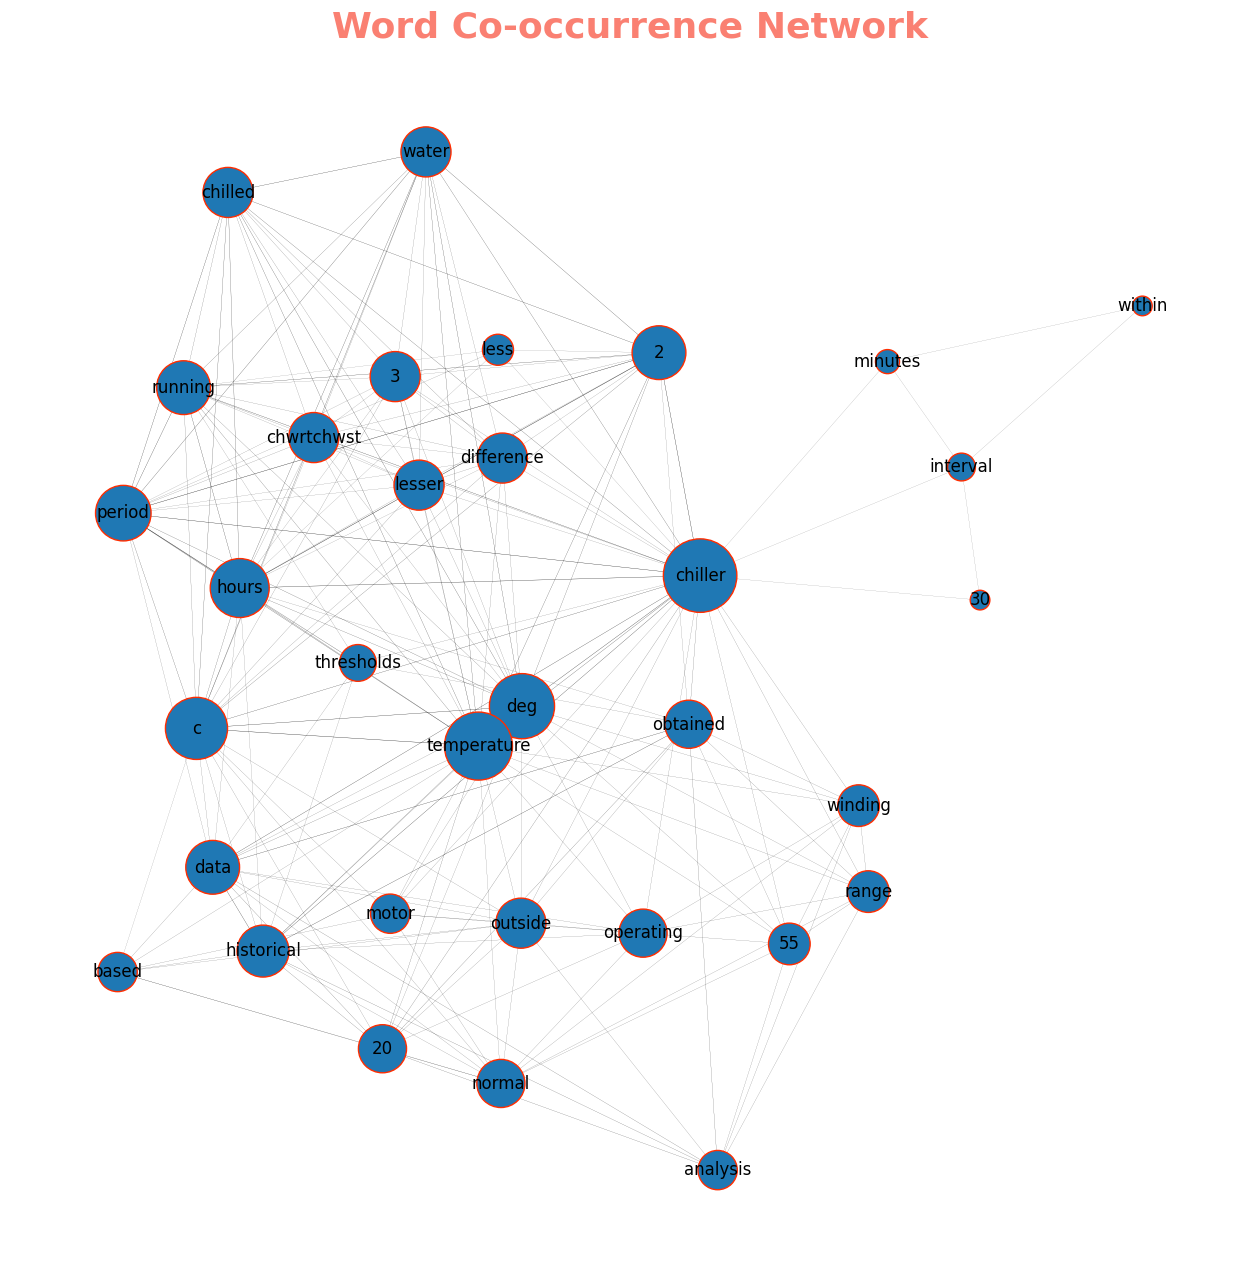

In [ ]:
pos_kkl = nx.kamada_kawai_layout(G)
f, ax = plt.subplots(figsize=(16, 16))


d = dict(nx.degree(G))
edges = G.edges()
weights = [G[u][v]['weight']/1000 for u,v in edges]

nx.draw(G, pos_kkl,
        with_labels=True,
        node_size=[v * 100 for v in d.values()],
        nodelist=d.keys(),
        width=weights,
        edge_color='black', #node_color=list(df_skills_stats['core_number']), cmap="coolwarm_r",
        #alpha=0.9,
       )
#node_labels = nx.draw_networkx_labels(G, pos_kkl, labels, font_size=10)
# Set title
ax.set_title('Word Co-occurrence Network',
             fontdict={'fontsize': 26,
            'fontweight': 'bold',
            'color': 'salmon',
            'verticalalignment': 'baseline',
            'horizontalalignment': 'center'},
             loc='center')
# Set edge color
plt.gca().collections[0].set_edgecolor("#FF2D00")

degree_centrality = nx.degree_centrality(G)
for node in sorted(degree_centrality, key=degree_centrality.get, reverse=True):
  print(node, degree_centrality[node])

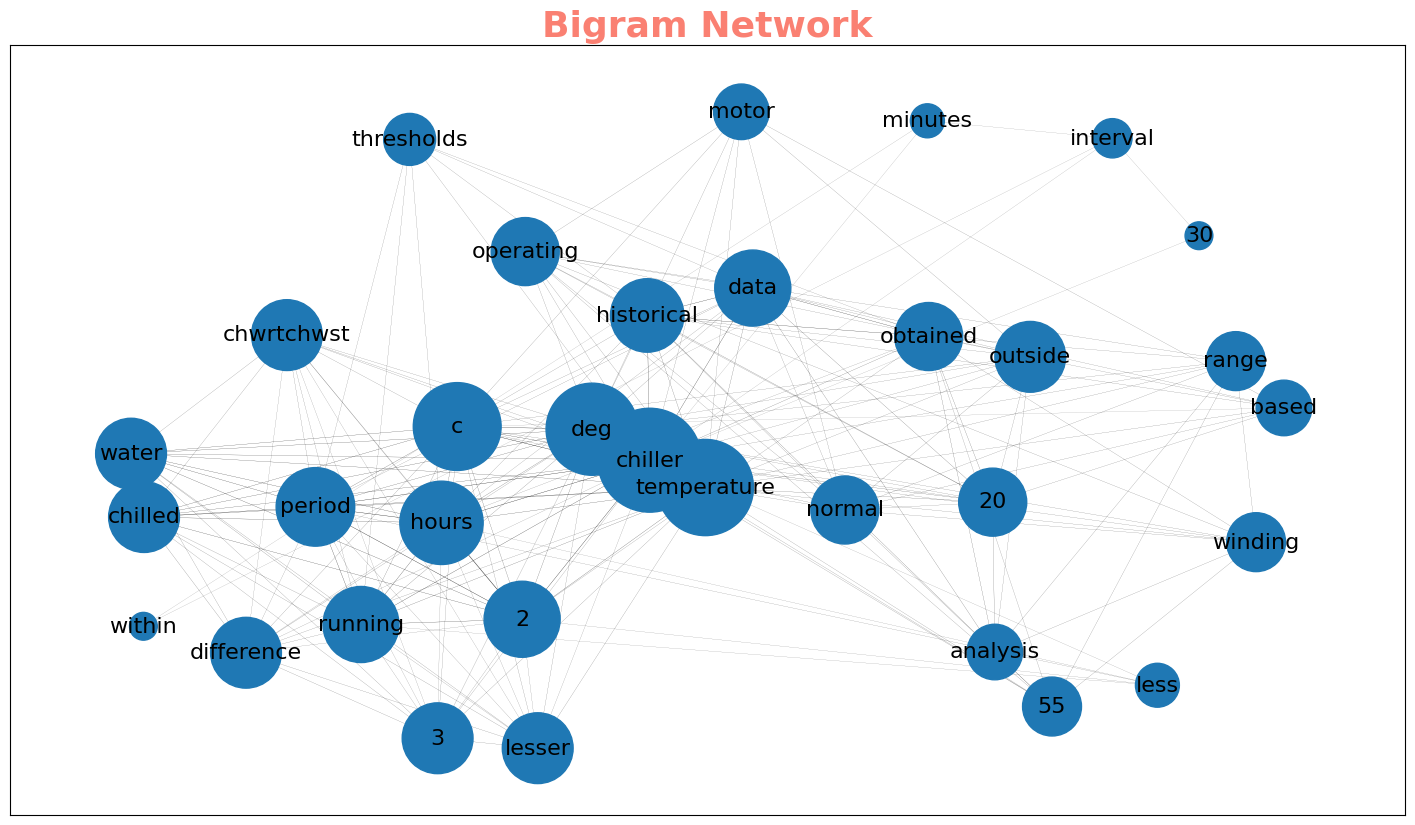

chiller 0.875
temperature 0.75
deg 0.6875
c 0.625
hours 0.5625
period 0.5
running 0.46875
2 0.46875
data 0.46875
historical 0.4375
3 0.40625
chwrtchwst 0.40625
lesser 0.40625
difference 0.40625
outside 0.40625
chilled 0.40625
water 0.40625
obtained 0.375
operating 0.375
normal 0.375
20 0.375
55 0.28125
range 0.28125
winding 0.28125
based 0.25
motor 0.25
analysis 0.25
thresholds 0.21875
less 0.15625
interval 0.125
minutes 0.09375
30 0.0625
within 0.0625


In [ ]:
fig, ax = plt.subplots(figsize=(18, 10))

pos = nx.spring_layout(G, k=8)

d = dict(nx.degree(G))
edges = G.edges()
weights = [G[u][v]['weight']/1000 for u,v in edges]
# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=weights,
                 node_size = [v * 200 for v in d.values()],
                 edge_color='black',
                 #node_color='tomato',
                 with_labels = True,
                 ax=ax)

ax.set_title('Bigram Network',
             fontdict={'fontsize': 26,
            'fontweight': 'bold',
            'color': 'salmon',
            'verticalalignment': 'baseline',
            'horizontalalignment': 'center'},
             loc='center')
plt.show()
degree_centrality = nx.degree_centrality(G)
for node in sorted(degree_centrality, key=degree_centrality.get, reverse=True):
  print(node, degree_centrality[node])

https://www.kaggle.com/code/xxxxyyyy80008/analyze-co-occurrence-and-networks-of-words

# Title

In [ ]:
# Create a sublist of lower case words for each sample

txts = df['title'].values.tolist()
words_in_text = []
for txt in txts:
    txt = clean_text(txt)
    words_in_text.append(get_words(txt, eng_stopwords))

In [ ]:
word_pairs = []
for words in words_in_text:
    words_ = list(set(words))
    for i in range(len(words_)-1):
        for j in range(i+1, len(words_)):
            word_i = words_[i]
            word_j = words_[j]
            if word_i < word_j:
                word_pairs.append([word_i, word_j])
            else:
                word_pairs.append([word_i, word_j])

In [ ]:
df_word_pairs = pd.DataFrame(data = word_pairs, columns=['word1', 'word2'])
word_pairs_count = df_word_pairs.groupby(['word1', 'word2']).size()
word_pairs_count = word_pairs_count.sort_values().tail(200).reset_index()

In [ ]:
word_pairs_count.tail(5)

word1    word2    0
195          deg   supply  106
196  temperature      deg  129
197  temperature        c  129
198   evaporator  chiller  137
199          deg        c  144

In [ ]:
# Create list of lists containing bigrams
terms_bigram = [list(bigrams(words)) for words in words_in_text]

# View bigrams for the first assay
print('View bigrams for the first assay')
print(terms_bigram[0][:5])

# Flatten list of bigrams in clean text
bigram_list = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigram_list)

bigram_counts.most_common(5)

View bigrams for the first assay
[('chiller', 'range'), ('range', 'normal'), ('normal', 'operating'), ('operating', 'ckt2'), ('ckt2', 'winding')]


[(('evaporator', 'chiller'), 137),
 (('chiller', 'temperature'), 104),
 (('temperature', 'deg'), 94),
 (('lesser', 'c'), 88),
 (('deg', '3'), 85)]

In [ ]:
# Create list of lists containing bigrams
terms_3gram = [list(ngrams(words, 3)) for words in words_in_text]

# View bigrams for the first assay
print('View N-grams (N=3) for the first assay')
print(terms_3gram[0][:5])


gram3_list = list(itertools.chain(*terms_3gram))

# Create counter of words in clean bigrams
gram3_counts = collections.Counter(gram3_list)

gram3_counts.most_common(5)

View N-grams (N=3) for the first assay
[('chiller', 'range', 'normal'), ('range', 'normal', 'operating'), ('normal', 'operating', 'ckt2'), ('operating', 'ckt2', 'winding'), ('ckt2', 'winding', 'temperature2a')]


[(('evaporator', 'chiller', 'temperature'), 104),
 (('temperature', 'deg', '3'), 85),
 (('chiller', 'range', 'normal'), 83),
 (('range', 'normal', 'operating'), 83),
 (('return', 'evaporator', 'chiller'), 83)]

In [ ]:
# Create network plot
G = nx.Graph()


for _, row in word_pairs_count.iterrows():
    G.add_edge(row['word1'], row['word2'], weight=row[0])

chiller 0.7954545454545455
temperature 0.4545454545454546
evaporator 0.4090909090909091
supply 0.34090909090909094
c 0.34090909090909094
deg 0.34090909090909094
chilled 0.2727272727272727
water 0.2727272727272727
pressure 0.2272727272727273
relationship 0.20454545454545456
header 0.20454545454545456
range 0.20454545454545456
winding 0.20454545454545456
motor 0.20454545454545456
operating 0.20454545454545456
normal 0.20454545454545456
outside 0.20454545454545456
return 0.20454545454545456
3 0.20454545454545456
lesser 0.20454545454545456
difference 0.20454545454545456
setpoint 0.18181818181818182
least 0.18181818181818182
loading 0.18181818181818182
factor 0.18181818181818182
power 0.18181818181818182
less 0.18181818181818182
ckt2 0.18181818181818182
temperature2a 0.18181818181818182
temperature1a 0.1590909090909091
refrigerant 0.13636363636363635
ckt 0.13636363636363635
high 0.13636363636363635
09 0.13636363636363635
083 0.13636363636363635
low 0.13636363636363635
non 0.1136363636363636

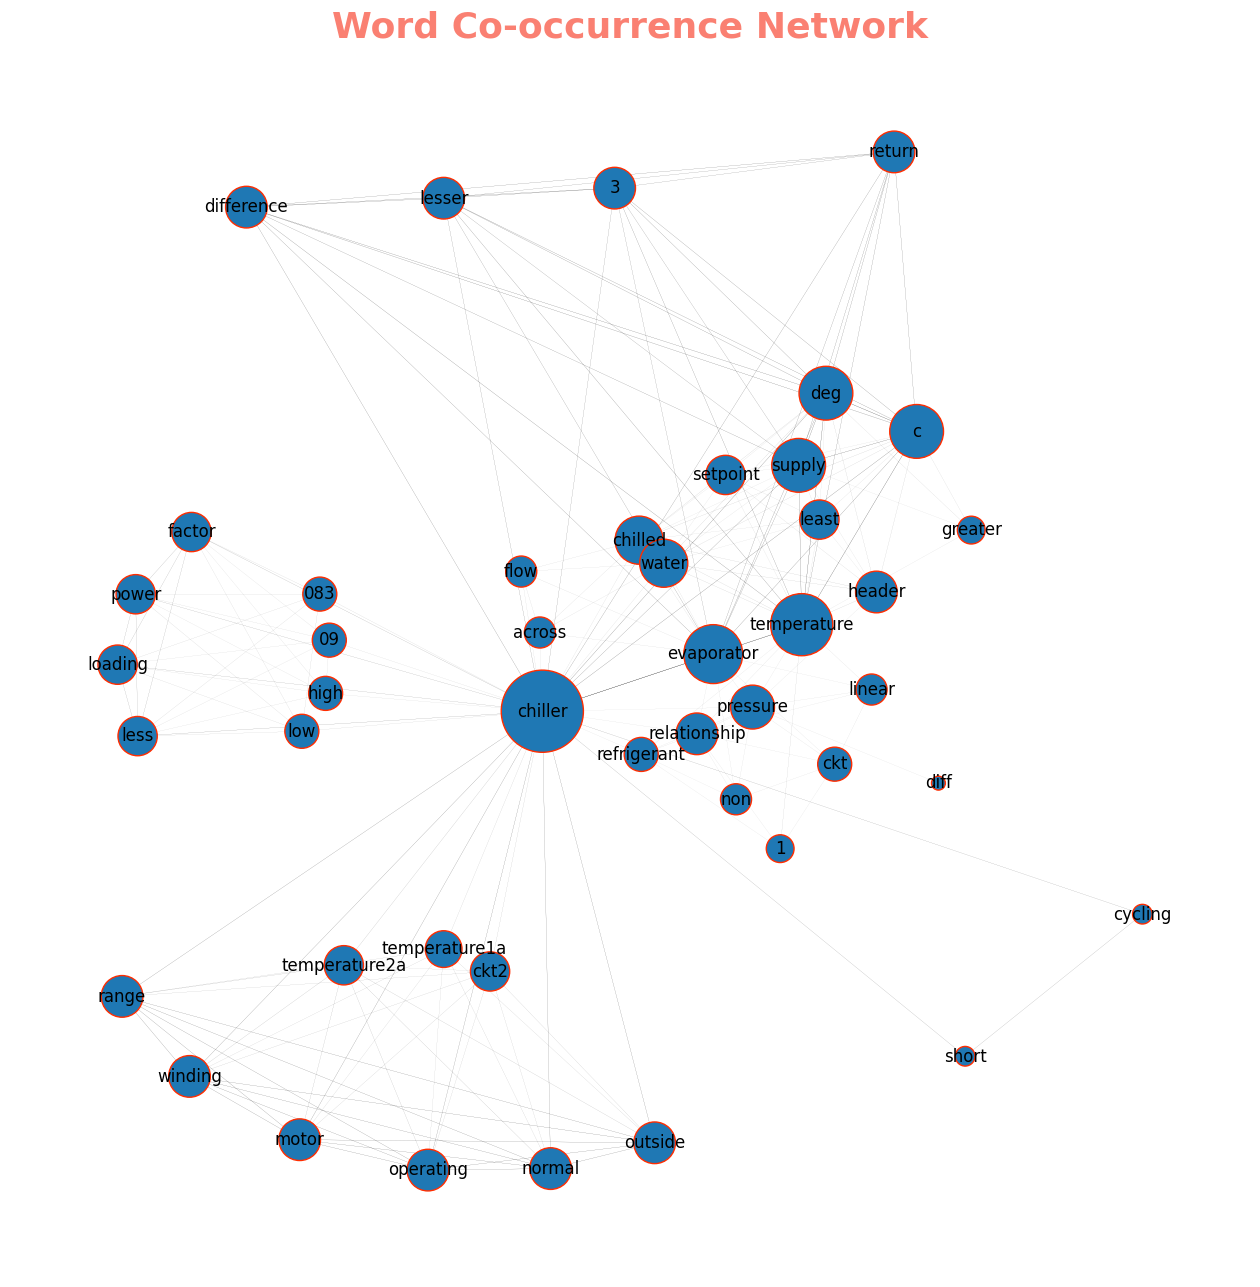

In [ ]:
pos_kkl = nx.kamada_kawai_layout(G)
f, ax = plt.subplots(figsize=(16, 16))


d = dict(nx.degree(G))
edges = G.edges()
weights = [G[u][v]['weight']/1000 for u,v in edges]

nx.draw(G, pos_kkl,
        with_labels=True,
        node_size=[v * 100 for v in d.values()],
        nodelist=d.keys(),
        width=weights,
        edge_color='black', #node_color=list(df_skills_stats['core_number']), cmap="coolwarm_r",
        #alpha=0.9,
       )
#node_labels = nx.draw_networkx_labels(G, pos_kkl, labels, font_size=10)
# Set title
ax.set_title('Word Co-occurrence Network',
             fontdict={'fontsize': 26,
            'fontweight': 'bold',
            'color': 'salmon',
            'verticalalignment': 'baseline',
            'horizontalalignment': 'center'},
             loc='center')
# Set edge color
plt.gca().collections[0].set_edgecolor("#FF2D00")

degree_centrality = nx.degree_centrality(G)
for node in sorted(degree_centrality, key=degree_centrality.get, reverse=True):
  print(node, degree_centrality[node])

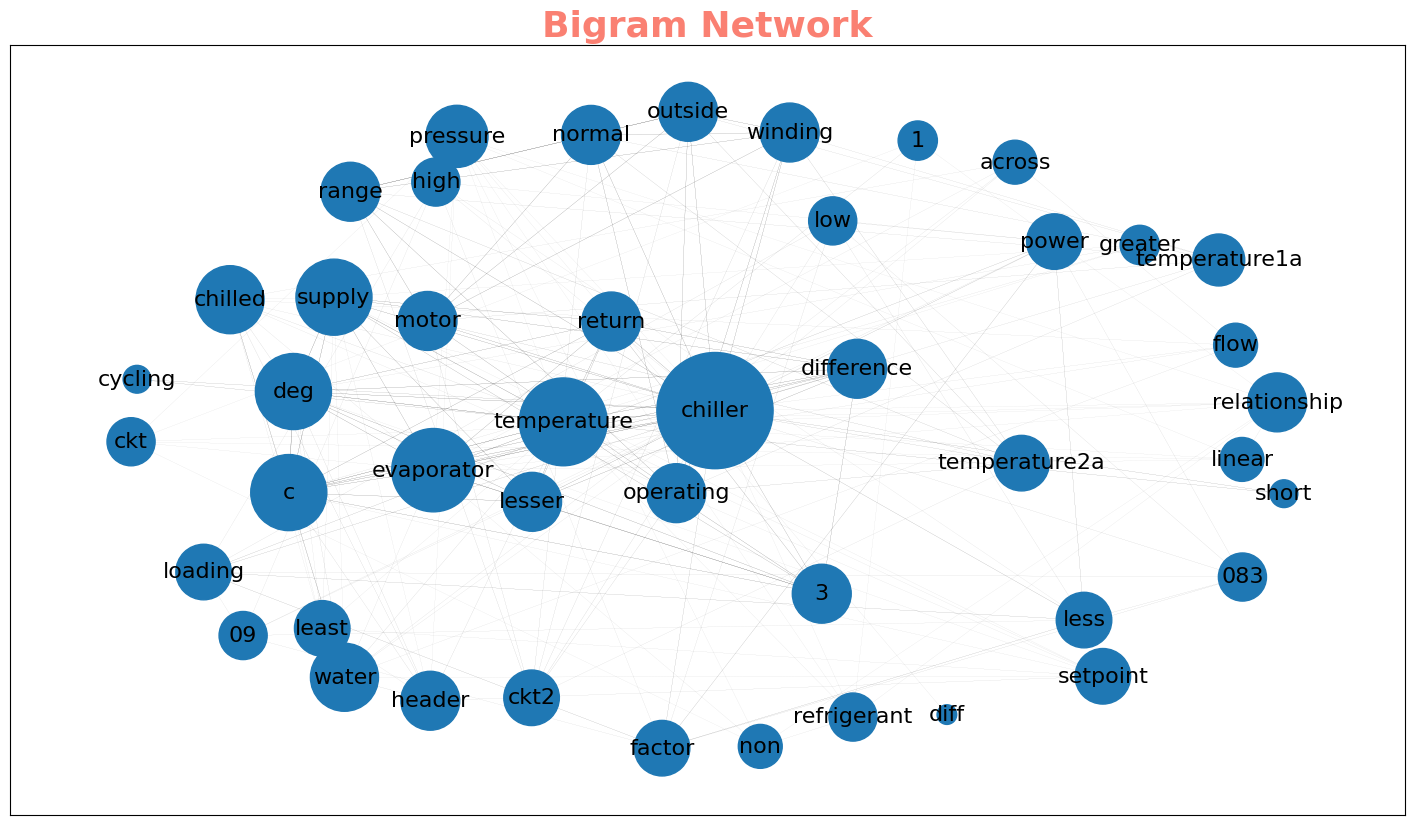

chiller 0.7954545454545455
temperature 0.4545454545454546
evaporator 0.4090909090909091
supply 0.34090909090909094
c 0.34090909090909094
deg 0.34090909090909094
chilled 0.2727272727272727
water 0.2727272727272727
pressure 0.2272727272727273
relationship 0.20454545454545456
header 0.20454545454545456
range 0.20454545454545456
winding 0.20454545454545456
motor 0.20454545454545456
operating 0.20454545454545456
normal 0.20454545454545456
outside 0.20454545454545456
return 0.20454545454545456
3 0.20454545454545456
lesser 0.20454545454545456
difference 0.20454545454545456
setpoint 0.18181818181818182
least 0.18181818181818182
loading 0.18181818181818182
factor 0.18181818181818182
power 0.18181818181818182
less 0.18181818181818182
ckt2 0.18181818181818182
temperature2a 0.18181818181818182
temperature1a 0.1590909090909091
refrigerant 0.13636363636363635
ckt 0.13636363636363635
high 0.13636363636363635
09 0.13636363636363635
083 0.13636363636363635
low 0.13636363636363635
non 0.1136363636363636

In [ ]:
fig, ax = plt.subplots(figsize=(18, 10))

pos = nx.spring_layout(G, k=8)

d = dict(nx.degree(G))
edges = G.edges()
weights = [G[u][v]['weight']/1000 for u,v in edges]
# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=weights,
                 node_size = [v * 200 for v in d.values()],
                 edge_color='black',
                 #node_color='tomato',
                 with_labels = True,
                 ax=ax)

ax.set_title('Bigram Network',
             fontdict={'fontsize': 26,
            'fontweight': 'bold',
            'color': 'salmon',
            'verticalalignment': 'baseline',
            'horizontalalignment': 'center'},
             loc='center')
plt.show()

degree_centrality = nx.degree_centrality(G)
for node in sorted(degree_centrality, key=degree_centrality.get, reverse=True):
  print(node, degree_centrality[node])

# Recommended Actions

In [ ]:
# Create a sublist of lower case words for each sample

txts = df['recommendedActions'].values.tolist()
words_in_text = []
for txt in txts:
    txt = clean_text(txt)
    words_in_text.append(get_words(txt, eng_stopwords))

In [ ]:
word_pairs = []
for words in words_in_text:
    words_ = list(set(words))
    for i in range(len(words_)-1):
        for j in range(i+1, len(words_)):
            word_i = words_[i]
            word_j = words_[j]
            if word_i < word_j:
                word_pairs.append([word_i, word_j])
            else:
                word_pairs.append([word_i, word_j])

In [ ]:
df_word_pairs = pd.DataFrame(data = word_pairs, columns=['word1', 'word2'])
word_pairs_count = df_word_pairs.groupby(['word1', 'word2']).size()
word_pairs_count = word_pairs_count.sort_values().tail(200).reset_index()

In [ ]:
word_pairs_count.tail(5)

word1  word2    0
195  chiller      1  281
196  chiller      2  317
197    check      1  346
198  chiller  check  374
199    check      2  387

In [ ]:
# Create list of lists containing bigrams
terms_bigram = [list(bigrams(words)) for words in words_in_text]

# View bigrams for the first assay
print('View bigrams for the first assay')
print(terms_bigram[0][:5])

# Flatten list of bigrams in clean text
bigram_list = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigram_list)

bigram_counts.most_common(5)

View bigrams for the first assay
[('chiller', 'bearing'), ('bearing', 'level'), ('level', 'check'), ('check', '2'), ('2', '1')]


[(('check', '2'), 239),
 (('2', '1'), 208),
 (('chiller', 'check'), 114),
 (('check', 'water'), 89),
 (('2', 'flow'), 87)]

In [ ]:
# Create list of lists containing bigrams
terms_3gram = [list(ngrams(words, 3)) for words in words_in_text]

# View bigrams for the first assay
print('View N-grams (N=3) for the first assay')
print(terms_3gram[0][:5])


gram3_list = list(itertools.chain(*terms_3gram))

# Create counter of words in clean bigrams
gram3_counts = collections.Counter(gram3_list)

gram3_counts.most_common(5)

View N-grams (N=3) for the first assay
[('chiller', 'bearing', 'level'), ('bearing', 'level', 'check'), ('level', 'check', '2'), ('check', '2', '1'), ('2', '1', 'compressor')]


[(('check', '2', '1'), 196),
 (('chiller', 'check', '2'), 103),
 (('chiller', 'bearing', 'level'), 83),
 (('bearing', 'level', 'check'), 83),
 (('level', 'check', '2'), 83)]

In [ ]:
# Create network plot
G = nx.Graph()


for _, row in word_pairs_count.iterrows():
    G.add_edge(row['word1'], row['word2'], weight=row[0])

chiller 0.8928571428571428
check 0.8571428571428571
2 0.7857142857142857
1 0.75
setpoint 0.6428571428571428
chilled 0.6428571428571428
water 0.6428571428571428
flow 0.6071428571428571
supply 0.6071428571428571
3 0.6071428571428571
ensure 0.6071428571428571
overridden 0.5714285714285714
specifications 0.5714285714285714
design 0.5357142857142857
pumps 0.5357142857142857
temperature 0.5
4 0.46428571428571425
deg 0.42857142857142855
c 0.3214285714285714
physical 0.3214285714285714
level 0.3214285714285714
bearing 0.3214285714285714
compressor 0.3214285714285714
motor 0.3214285714285714
oil 0.3214285714285714
rate 0.2857142857142857
bypass 0.17857142857142855
within 0.07142857142857142
logic 0.03571428571428571


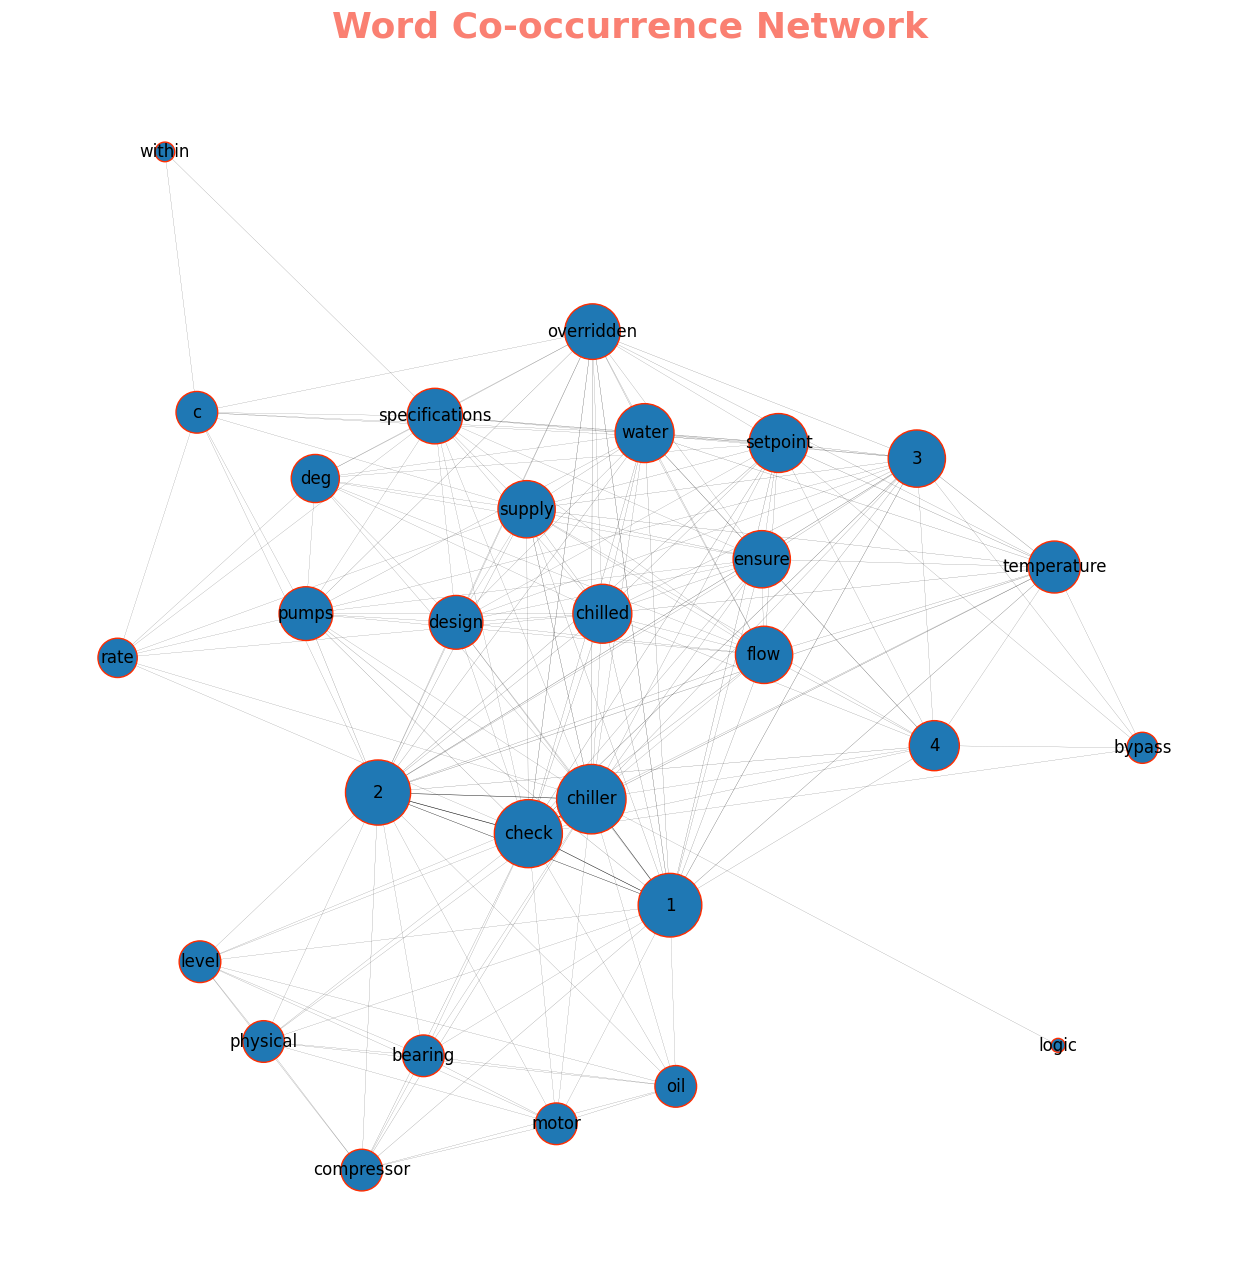

In [ ]:
pos_kkl = nx.kamada_kawai_layout(G)
f, ax = plt.subplots(figsize=(16, 16))


d = dict(nx.degree(G))
edges = G.edges()
weights = [G[u][v]['weight']/1000 for u,v in edges]

nx.draw(G, pos_kkl,
        with_labels=True,
        node_size=[v * 100 for v in d.values()],
        nodelist=d.keys(),
        width=weights,
        edge_color='black', #node_color=list(df_skills_stats['core_number']), cmap="coolwarm_r",
        #alpha=0.9,
       )
#node_labels = nx.draw_networkx_labels(G, pos_kkl, labels, font_size=10)
# Set title
ax.set_title('Word Co-occurrence Network',
             fontdict={'fontsize': 26,
            'fontweight': 'bold',
            'color': 'salmon',
            'verticalalignment': 'baseline',
            'horizontalalignment': 'center'},
             loc='center')
# Set edge color
plt.gca().collections[0].set_edgecolor("#FF2D00")

degree_centrality = nx.degree_centrality(G)
for node in sorted(degree_centrality, key=degree_centrality.get, reverse=True):
  print(node, degree_centrality[node])

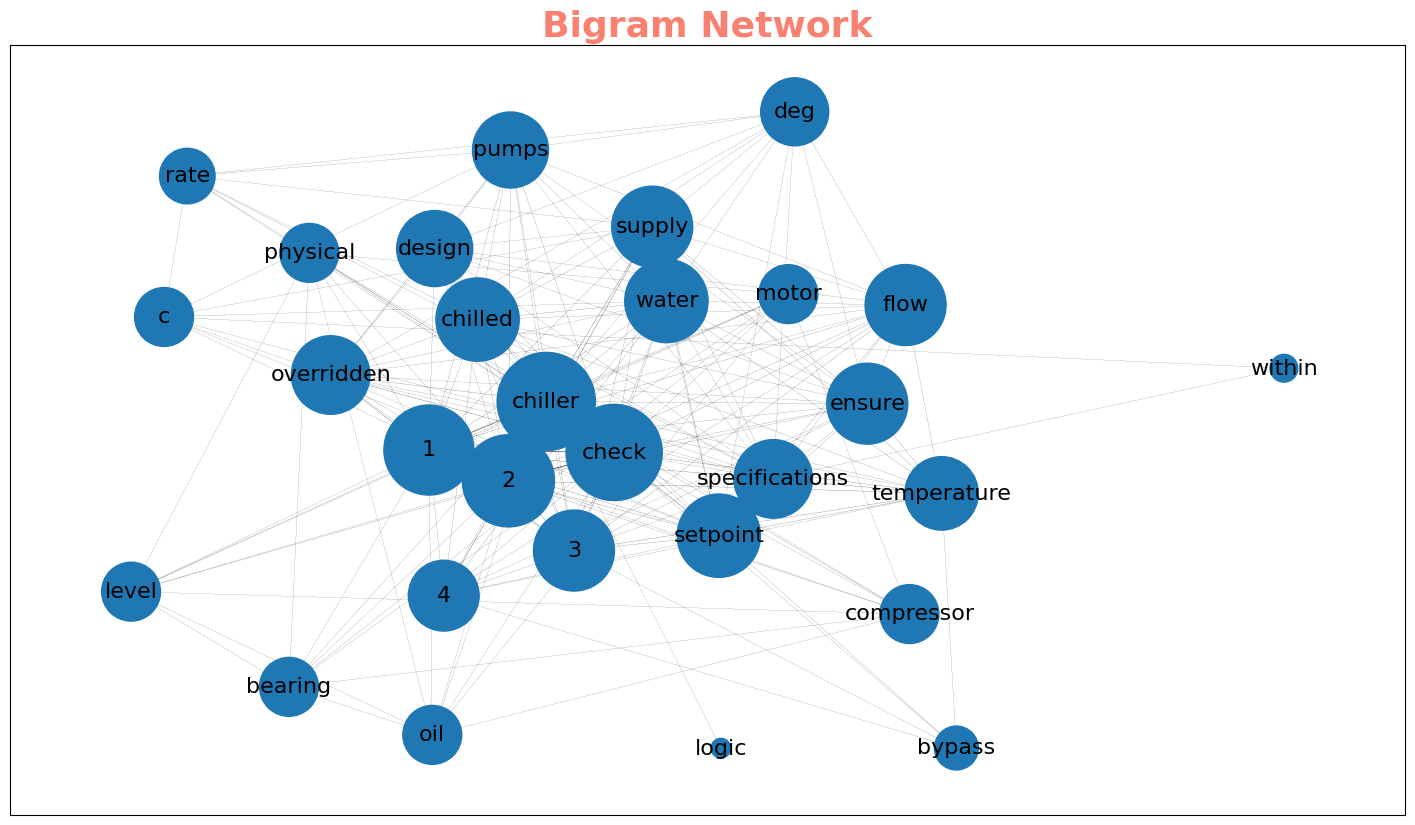

chiller 0.8928571428571428
check 0.8571428571428571
2 0.7857142857142857
1 0.75
setpoint 0.6428571428571428
chilled 0.6428571428571428
water 0.6428571428571428
flow 0.6071428571428571
supply 0.6071428571428571
3 0.6071428571428571
ensure 0.6071428571428571
overridden 0.5714285714285714
specifications 0.5714285714285714
design 0.5357142857142857
pumps 0.5357142857142857
temperature 0.5
4 0.46428571428571425
deg 0.42857142857142855
c 0.3214285714285714
physical 0.3214285714285714
level 0.3214285714285714
bearing 0.3214285714285714
compressor 0.3214285714285714
motor 0.3214285714285714
oil 0.3214285714285714
rate 0.2857142857142857
bypass 0.17857142857142855
within 0.07142857142857142
logic 0.03571428571428571


In [ ]:
fig, ax = plt.subplots(figsize=(18, 10))

pos = nx.spring_layout(G, k=8)

d = dict(nx.degree(G))
edges = G.edges()
weights = [G[u][v]['weight']/1000 for u,v in edges]
# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=weights,
                 node_size = [v * 200 for v in d.values()],
                 edge_color='black',
                 #node_color='tomato',
                 with_labels = True,
                 ax=ax)

ax.set_title('Bigram Network',
             fontdict={'fontsize': 26,
            'fontweight': 'bold',
            'color': 'salmon',
            'verticalalignment': 'baseline',
            'horizontalalignment': 'center'},
             loc='center')
plt.show()

degree_centrality = nx.degree_centrality(G)
for node in sorted(degree_centrality, key=degree_centrality.get, reverse=True):
  print(node, degree_centrality[node])

# Phrase Mining

In [ ]:
!pip install -U autophrasex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.3/778.3 kB 15.1 MB/s eta 0:00:00


In [ ]:
### Phrase mining need to input output.txt(with all the text combined) and wiki_quality.txt file


from autophrasex import *

autophrase = AutoPhrase(
    reader=DefaultCorpusReader(tokenizer=JiebaTokenizer()),
    selector=DefaultPhraseSelector(),
    extractors=[
        NgramsExtractor(N=4),
        IDFExtractor(),
        EntropyExtractor()
    ]
)

predictions = autophrase.mine(
    corpus_files=['/content/output.txt'],
    quality_phrase_files='/content/wiki_quality.txt',
    callbacks=[
        LoggingCallback(),
        ConstantThresholdScheduler(),
        EarlyStopping(patience=2, min_delta=3)
    ])


Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.cache
Loading model cost 1.561 seconds.
DEBUG:jieba:Loading model cost 1.561 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


In [ ]:
phrase = pd.DataFrame(predictions, columns=['phrase','score'])
phrase.head()

phrase     score
0  electrical  0.983558
1     winding  0.980000
2         ref  0.830000
3       check  0.380000
4   generated  0.288892

In [ ]:
phrase['word count'] = phrase['phrase'].str.split().str.len()
phrase.sort_values(by=['score'], ascending=False)
phrase[:10]

phrase     score  word count
0    electrical  0.983558           1
1       winding  0.980000           1
2           ref  0.830000           1
3         check  0.380000           1
4     generated  0.288892           1
5  optimization  0.288892           1
6     setpoints  0.288892           1
7     equipment  0.288892           1
8      controls  0.288892           1
9            10  0.250000           1

In [ ]:
phraselist = phrase[phrase['word count']>1].sort_values(by=['score'], ascending=False).reset_index(drop=True)
phraselist[:10]

phrase  score  word count
0                   a power   0.14           2
1             chilled water   0.13           2
2            a power factor   0.10           3
3                 flow rate   0.10           2
4                     deg c   0.09           2
5             chiller motor   0.07           2
6  historical data analysis   0.07           3
7  water supply temperature   0.06           3
8                water flow   0.04           2
9      chilled water supply   0.04           3

In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


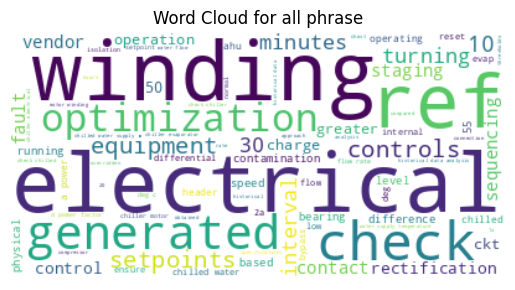

In [ ]:
from wordcloud import WordCloud

phrase_dict = phrase.set_index('phrase').to_dict()['score']
phrase_dict

wordcloud = WordCloud(background_color="white").generate_from_frequencies(phrase_dict)

plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud for all phrase")
plt.axis("off")
plt.show()

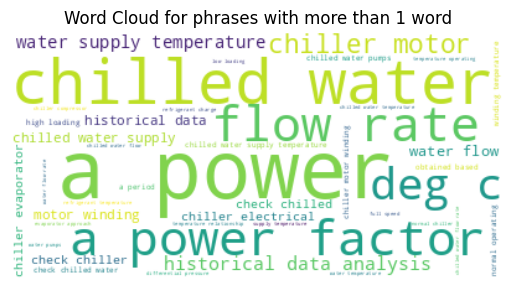

In [ ]:
phrase_dict = phraselist.set_index('phrase').to_dict()['score']
phrase_dict
wordcloud = WordCloud(background_color="white").generate_from_frequencies(phrase_dict)

plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud for phrases with more than 1 word")
plt.axis("off")
plt.show()

# Model to predict next word(s) in the Sequence

# One word in, One word out

In [ ]:
from keras.preprocessing.text import Tokenizer
# integer encode text


sentences = de.values.tolist()
wd = ' '
for sentence in sentences:
  wd += ' '+sentence

#wd = preprocess(wd)
tokenizer = Tokenizer(split=' ')
tokenizer.fit_on_texts([wd])
encoded = tokenizer.texts_to_sequences([wd])[0]
#print(len(encoded))
#print(wd)

In [ ]:
# determine the vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)

In [ ]:
# create word -> word sequences
sequences = []
for i in range(1, len(encoded)):
    sequence = encoded[i-1:i+1]
    sequences.append(sequence)
print('Total Sequences: %d' % len(sequences))

In [ ]:
# split into X and y elements
import numpy as np
import pandas as pd
sequences = np.array(sequences)
X, y = sequences[:,0],sequences[:,1]

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
# one hot encode outputs
y = to_categorical(y, num_classes=vocab_size)
#print(X)

In [ ]:
# define the model
def define_model(vocab_size):
    model = Sequential()
    model.add(Embedding(vocab_size, 10, input_length=1))
    model.add(LSTM(50))
    model.add(Dense(vocab_size, activation='softmax'))
    # compile network
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'], run_eagerly=True)
    # summarize defined model
    model.summary()
    plot_model(model, to_file='model.png', show_shapes=True)
    return model

In [ ]:
model = define_model(vocab_size) # build the model

In [ ]:
model.fit(X, y, epochs=20, verbose=2) # fit the model

In [ ]:
# evaluate
in_text = 'chiller'
print(in_text)
encoded = tokenizer.texts_to_sequences([in_text])[0]
encoded = np.array(encoded)
yhat = np.argmax(model.predict(encoded), axis=-1)
#yhat = model.predict_classes(encoded, verbose=0)
#yhat =  (model.predict(x_test) > 0.5).astype("int32")
for word, index in tokenizer.word_index.items():
    if index == yhat:
        print(word)
#predictions = (model.predict(encoded) > 0.5).astype("int32")
#predict_x=model.predict(X_test)
#classes_x=np.argmax(predict_x,axis=1)

print(yhat)

In [ ]:
# generate a sequence from the model
def generate_seq(model, tokenizer, seed_text, n_words):
    in_text, result = seed_text, seed_text
    # generate a fixed number of words
    for _ in range(n_words):
        # encode the text as integer
        encoded = tokenizer.texts_to_sequences([in_text])[0]
        encoded = np.array(encoded)
        # predict a word in the vocabulary
        yhat = np.argmax(model.predict(encoded), axis=-1)
        #yhat = model.predict_classes(encoded, verbose=0)
        # map predicted word index to word
        out_word = ''
        for word, index in tokenizer.word_index.items():
            if index == yhat:
                out_word = word
                break
    # append to input
        in_text, result = out_word, result + ' ' + out_word
    return result

In [ ]:
print(generate_seq(model, tokenizer, 'Chiller', 10))

https://www.kaggle.com/code/jagdmir/model-to-predict-next-word-s-in-the-sequence/notebook#Model-3:-Two-Words-In,-One-Word-Out-Sequence

# Two word in, One word out

In [ ]:
# generate a sequence from a language model
def generate_seq(model, tokenizer, max_length, seed_text, n_words):
    in_text = seed_text
    # generate a fixed number of words
    for _ in range(n_words):
        # encode the text as integer
        encoded = tokenizer.texts_to_sequences([in_text])[0]
        # pre-pad sequences to a fixed length
        encoded = pad_sequences([encoded], maxlen=max_length, padding='pre')
        # predict probabilities for each word
        yhat = np.argmax(model.predict(encoded), axis=-1)
        #yhat = model.predict_classes(encoded, verbose=0)
        # map predicted word index to word
        out_word = ''
        for word, index in tokenizer.word_index.items():
            if index == yhat:
                out_word = word
                break
                # append to input
        in_text += ' ' + out_word
    return in_text

In [ ]:
# tokenize the data
tokenizer = Tokenizer()
tokenizer.fit_on_texts([wd])
encoded = tokenizer.texts_to_sequences([wd])[0]

In [ ]:
sequences = list()
for i in range(2, len(encoded)):
    sequence = encoded[i-2:i+1]
    sequences.append(sequence)
print('Total Sequences: %d' % len(sequences))

In [ ]:
! pip install pad_sequences

In [ ]:
from keras.utils import pad_sequences
# pad sequences
max_length = max([len(seq) for seq in sequences])
sequences = pad_sequences(sequences, maxlen=max_length, padding='pre')
print('Max Sequence Length: %d' % max_length)

In [ ]:
# split into input and output elements
sequences = np.array(sequences)
X, y = sequences[:,:-1],sequences[:,-1]
y = to_categorical(y, num_classes=vocab_size)

In [ ]:
# define the model
def define_model(vocab_size, max_length):
    model = Sequential()
    model.add(Embedding(vocab_size, 10, input_length=max_length-1))
    model.add(LSTM(50))
    model.add(Dense(vocab_size, activation='softmax'))
    # compile network
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # summarize defined model
    model.summary()
    plot_model(model, to_file='model.png', show_shapes=True)
    return model

In [ ]:
# define model
model = define_model(vocab_size, max_length)
# fit network
model.fit(X, y, epochs=20, verbose=2)

In [ ]:
# evaluate model
print(generate_seq(model, tokenizer, max_length-1, 'chiller range', 5))

# Phrase Mining Graph

In [ ]:
import os
import re
import networkx as nx

In [ ]:
phrases = phrase['phrase'].tolist()

In [ ]:
with open('/content/output.txt') as f:
    sentences = f.read().splitlines()

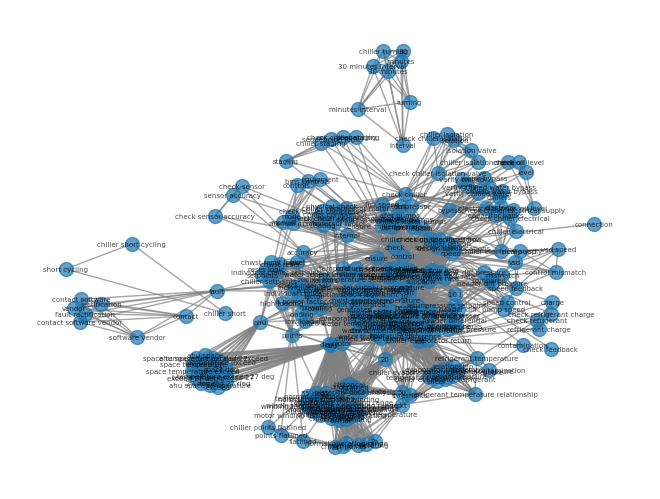

In [ ]:
G = nx.Graph()
for sentence in sentences:
  # Tokenize the sentence into individual words
  words = sentence.lower()
  # Loop through all pairs of phrases and check if they co-occur
  for i in range(len(phrases)):
    for j in range(i+1, len(phrases)):
      phrase1 = phrases[i]
      phrase2 = phrases[j]
      if phrase1 in words and phrase2 in words:
        G.add_edge(phrase1, phrase2)

## Draw the graph
pos = nx.spring_layout(G, k=0.3)
nx.draw(G, pos, with_labels=True, font_size=5, node_size=100, edge_color='gray', width=1.0, alpha=0.7)
plt.show()



In [ ]:
from matplotlib.layout_engine import do_constrained_layout
dc = nx.degree_centrality(G)
df = pd.DataFrame.from_dict({
    'node': list(dc.keys()),
    'centrality': list(dc.values())})
dc = df.sort_values('centrality', ascending=False)
dc[:10]

node  centrality
170          check    0.459259
18           deg c    0.396296
17             deg    0.396296
45         chilled    0.318519
43   chilled water    0.318519
112           hour    0.307407
139          hours    0.288889
140       a period    0.255556
32            diff    0.240741
16            evap    0.222222

In [ ]:
phraselists = phraselist['phrase'].tolist()
with open('/content/output.txt') as f:
    sentences = f.read().splitlines()

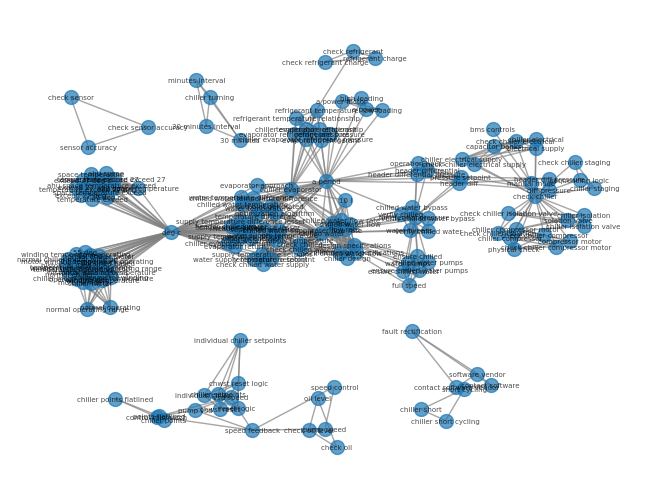

In [ ]:
G = nx.Graph()
for sentence in sentences:
  # Tokenize the sentence into individual words
  words = sentence.lower()
  # Loop through all pairs of phrases and check if they co-occur
  for i in range(len(phraselists)):
    for j in range(i+1, len(phraselists)):
      phrase1 = phraselists[i]
      phrase2 = phraselists[j]
      if phrase1 in words and phrase2 in words:
        G.add_edge(phrase1, phrase2)

## Draw the graph
pos = nx.spring_layout(G, k=0.3)
nx.draw(G, pos, with_labels=True, font_size=5, node_size=100, edge_color='gray', width=1.0, alpha=0.7)
plt.show()

In [ ]:
dc = nx.degree_centrality(G)
df = pd.DataFrame.from_dict({
    'node': list(dc.keys()),
    'centrality': list(dc.values())})
dc = df.sort_values('centrality', ascending=False)
dc[:10]

node  centrality
9                               deg c    0.391566
22                      chilled water    0.295181
87                           a period    0.222892
10                 chiller evaporator    0.156627
8                     operating range    0.144578
1                       motor winding    0.144578
11                 supply temperature    0.144578
0                       chiller motor    0.144578
7           motor winding temperature    0.144578
6   chiller motor winding temperature    0.144578